Daily Challenge : Comprehensive Mobile Price Analysis


Mobile



👩‍🏫 👩🏿‍🏫 What You’ll learn
Master advanced data manipulation and statistical analysis using NumPy and SciPy.
Gain proficiency in data preprocessing and exploration with Pandas.
Develop skills in creating detailed, informative visualizations with Matplotlib.
Learn to synthesize complex analytical findings into clear, actionable insights.


Project Tasks
1. Data Loading and Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.


2. Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.


3. Statistical Analysis with NumPy and SciPy:
Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.


4. Data Visualization with Matplotlib:
Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.


5. Insight Synthesis and Conclusion:
Derive conclusions from statistical tests and visualizations.
Identify key determinants in mobile price classification.
Highlight any unexpected or significant findings.


Resources
Download the train dataset from this repository, it comes from the Mobile Price Classification Dataset


Project Submission
Submit the following in a GitHub repository:

Data_Analysis.ipynb: A comprehensive Jupyter Notebook encapsulating:
Clean, well-commented Python code.
Distinct headings for each analysis phase.
In-depth comments elucidating findings and the importance of each analytical step.


Pro Tips
Individually examine each feature to grasp its unique traits and influence.
Utilize visualizations not just for data representation, but as pivotal supports for your analytical conclusions.
Reference course materials for guidance on complex statistical functions and their practical uses.




In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/content/train.csv')

Data Loading and Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.

In [2]:
print(df.info())
print(df.describe())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} potential outliers")

battery_power: 0 potential outliers
blue: 0 potential outliers
clock_speed: 0 potential outliers
dual_sim: 0 potential outliers
fc: 18 potential outliers
four_g: 0 potential outliers
int_memory: 0 potential outliers
m_dep: 0 potential outliers
mobile_wt: 0 potential outliers
n_cores: 0 potential outliers
pc: 0 potential outliers
px_height: 2 potential outliers
px_width: 0 potential outliers
ram: 0 potential outliers
sc_h: 0 potential outliers
sc_w: 0 potential outliers
talk_time: 0 potential outliers
three_g: 477 potential outliers
touch_screen: 0 potential outliers
wifi: 0 potential outliers
price_range: 0 potential outliers


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'battery_power': [ 842 1021  563 ... 1139 1467  858]
Unique values in column 'blue': [0 1]
Unique values in column 'clock_speed': [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values in column 'dual_sim': [0 1]
Unique values in column 'fc': [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values in column 'four_g': [0 1]
Unique values in column 'int_memory': [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values in column 'm_dep': [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values in column 'mobile_wt': [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 14

three_g, touch_screen, wifi, four_g, dual_sim and blue are categoricals as yes/no.
price_range also seems to be categorical as in from low to high price range.
therefore we consider outliers only from px_height and fc

2. Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.

In [5]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df = remove_outliers(df, 'fc')
df = remove_outliers(df, 'px_height')

In [6]:
# I mean, all data was already numerical so I guess I'll do the oposite
bi_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for col in bi_columns:
    df[f'{col}_mapped'] = df[col].map({0: 'No', 1: 'Yes'})
price_range_mapping = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'}
df['price_range_mapped'] = df['price_range'].map(price_range_mapping)

In [7]:
for col in bi_columns:
  print(df[f'{col}_mapped'])
print(df['price_range_mapped'])

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1995    Yes
1996    Yes
1997     No
1998     No
1999    Yes
Name: blue_mapped, Length: 1980, dtype: object
0        No
1       Yes
2       Yes
3        No
4        No
       ... 
1995    Yes
1996    Yes
1997    Yes
1998     No
1999    Yes
Name: dual_sim_mapped, Length: 1980, dtype: object
0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
1995    Yes
1996     No
1997    Yes
1998    Yes
1999    Yes
Name: four_g_mapped, Length: 1980, dtype: object
0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1995    Yes
1996    Yes
1997    Yes
1998    Yes
1999    Yes
Name: three_g_mapped, Length: 1980, dtype: object
0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
1995    Yes
1996    Yes
1997    Yes
1998    Yes
1999    Yes
Name: touch_screen_mapped, Length: 1980, dtype: object
0       Yes
1        No
2        No
3        No
4        No
       ... 
1995     No
1996

In [8]:
numeric_df = df.select_dtypes(include=np.number)
mean = numeric_df.mean()
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)

Mean:
 battery_power    1236.402020
blue                0.494444
clock_speed         1.521162
dual_sim            0.509091
fc                  4.189899
four_g              0.520707
int_memory         32.055051
m_dep               0.502222
mobile_wt         140.168182
n_cores             4.527273
pc                  9.836364
px_height         641.183838
px_width         1249.646465
ram              2125.135859
sc_h               12.316667
sc_w                5.773737
talk_time          11.003535
three_g             0.760606
touch_screen        0.501515
wifi                0.505051
price_range         1.497980
dtype: float64

Median:
 battery_power    1224.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         561.5
px_width         1247.0
ram              2146.5
sc_h               12.0

In [9]:
range_values = numeric_df.max() - numeric_df.min()
variance = numeric_df.var()
std_dev = numeric_df.std()
print("Range:\n", range_values)
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)

Range:
 battery_power    1497.0
blue                1.0
clock_speed         2.5
dual_sim            1.0
fc                 16.0
four_g              1.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
n_cores             7.0
pc                 20.0
px_height        1920.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

Variance:
 battery_power    1.932207e+05
blue             2.500954e-01
clock_speed      6.678743e-01
dual_sim         2.500436e-01
fc               1.737574e+01
four_g           2.496973e-01
int_memory       3.285816e+02
m_dep            8.336040e-02
mobile_wt        1.252099e+03
n_cores          5.249887e+00
pc               3.628145e+01
px_height        1.935630e+05
px_width         1.862844e+05
ram              1.176264e+06
sc_h             1.771827e+01
sc_w       

In [10]:
skewness = numeric_df.skew()
kurtosis = numeric_df.kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Skewness:
 battery_power    0.040468
blue             0.022240
clock_speed      0.181189
dual_sim        -0.036397
fc               0.945650
four_g          -0.082962
int_memory       0.060594
m_dep            0.086254
mobile_wt        0.006635
n_cores         -0.000866
pc               0.023137
px_height        0.657550
px_width         0.018171
ram              0.005994
sc_h            -0.100504
sc_w             0.626122
talk_time        0.012094
three_g         -1.222383
touch_screen    -0.006065
wifi            -0.020218
price_range      0.001806
dtype: float64

Kurtosis:
 battery_power   -1.223386
blue            -2.001528
clock_speed     -1.326055
dual_sim        -2.000697
fc               0.010955
four_g          -1.995134
int_memory      -1.212759
m_dep           -1.277651
mobile_wt       -1.207553
n_cores         -1.232911
pc              -1.161047
px_height       -0.338700
px_width        -1.183900
ram             -1.187763
sc_h            -1.186788
sc_w            -0.401311


In [11]:
# ANOVA test for battery_power vs price_range
f_stat, p_value = stats.f_oneway(
    df[df['price_range'] == 0]['battery_power'],
    df[df['price_range'] == 1]['battery_power'],
    df[df['price_range'] == 2]['battery_power'],
    df[df['price_range'] == 3]['battery_power']
)

print(f"ANOVA test for battery_power vs price_range: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA test for battery_power vs price_range: F-statistic = 31.02906952568987, p-value = 1.3464448762892089e-19


null hypothesis rejected, there's significan difference in battery power across different price ranges.

In [12]:
correlations = numeric_df.corr()
correlation_with_target = correlations['price_range']
print("Correlations with price_range:\n", correlation_with_target)

Correlations with price_range:
 battery_power    0.200763
blue             0.015798
clock_speed     -0.006120
dual_sim         0.019016
fc               0.021120
four_g           0.015906
int_memory       0.043458
m_dep           -0.000925
mobile_wt       -0.031628
n_cores          0.008307
pc               0.033871
px_height        0.144277
px_width         0.165132
ram              0.917009
sc_h             0.025641
sc_w             0.038076
talk_time        0.020582
three_g          0.025462
touch_screen    -0.033888
wifi             0.017192
price_range      1.000000
Name: price_range, dtype: float64


In [13]:
contingency_table = pd.crosstab(df['price_range'], df['ram'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square test: chi2_stat = {chi2_stat}, p-value = {p_val}")

Chi-Square test: chi2_stat = 5346.18498904011, p-value = 9.193724348204622e-13


as for chi_test we can see that there's strong relationship between price range and ram and we reject null hypothesis as for p being way less than 0.05

. Data Visualization with Matplotlib:
Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.

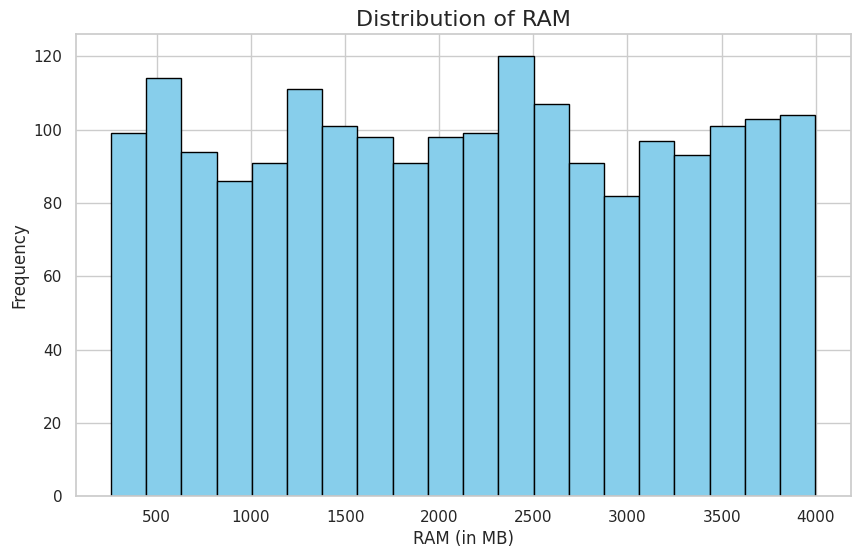

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.hist(df['ram'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of RAM', fontsize=16)
plt.xlabel('RAM (in MB)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Ram distributed overall equally

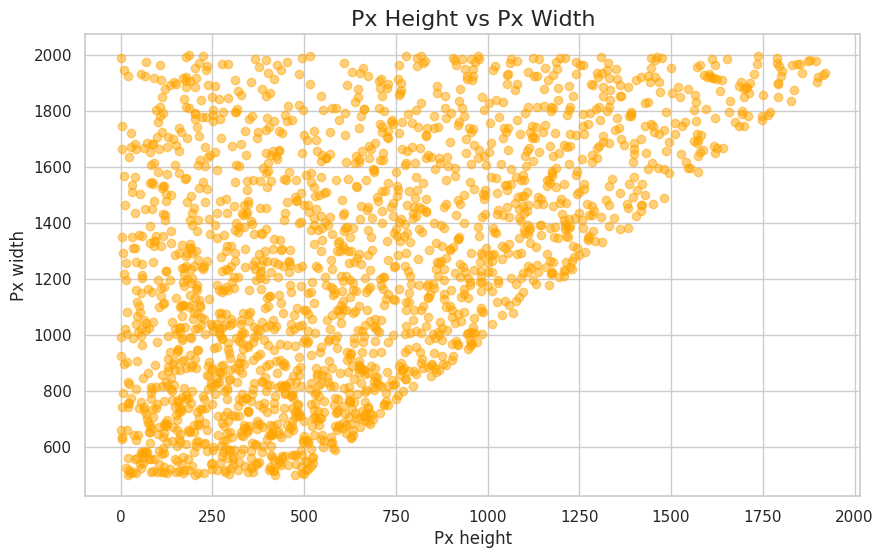

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['px_height'], df['px_width'], color='orange', alpha=0.5)
plt.title('Px Height vs Px Width', fontsize=16)
plt.xlabel('Px height', fontsize=12)
plt.ylabel('Px width', fontsize=12)
plt.show()

We can note that once height reaches 600 there's a tendency line that follows approximately x = y

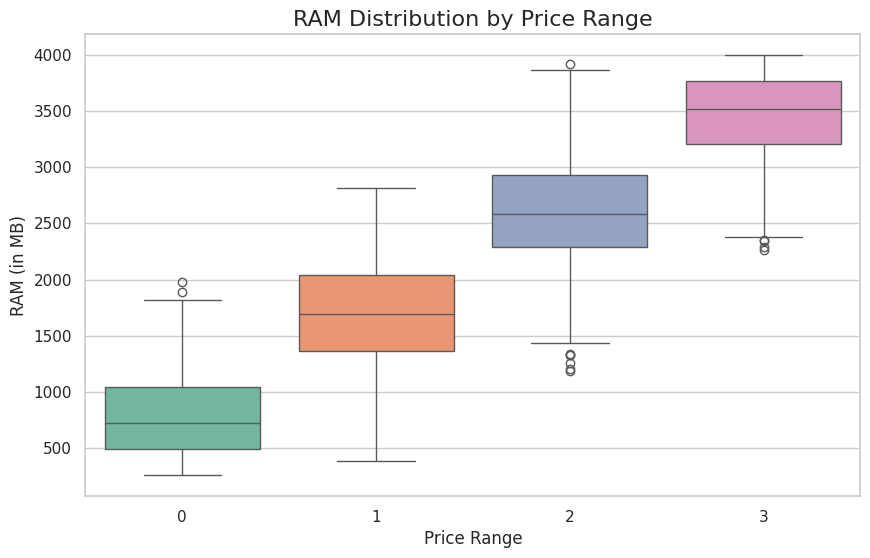

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=df,hue = 'price_range', legend = False, palette='Set2')
plt.title('RAM Distribution by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('RAM (in MB)', fontsize=12)
plt.show()

With higher price range we can see higher values overall of RAM, i.e. higher median price, higher lower and maximum price even tho there're intersections usually betwen higher half of the lower price range and lower half of higher price range.

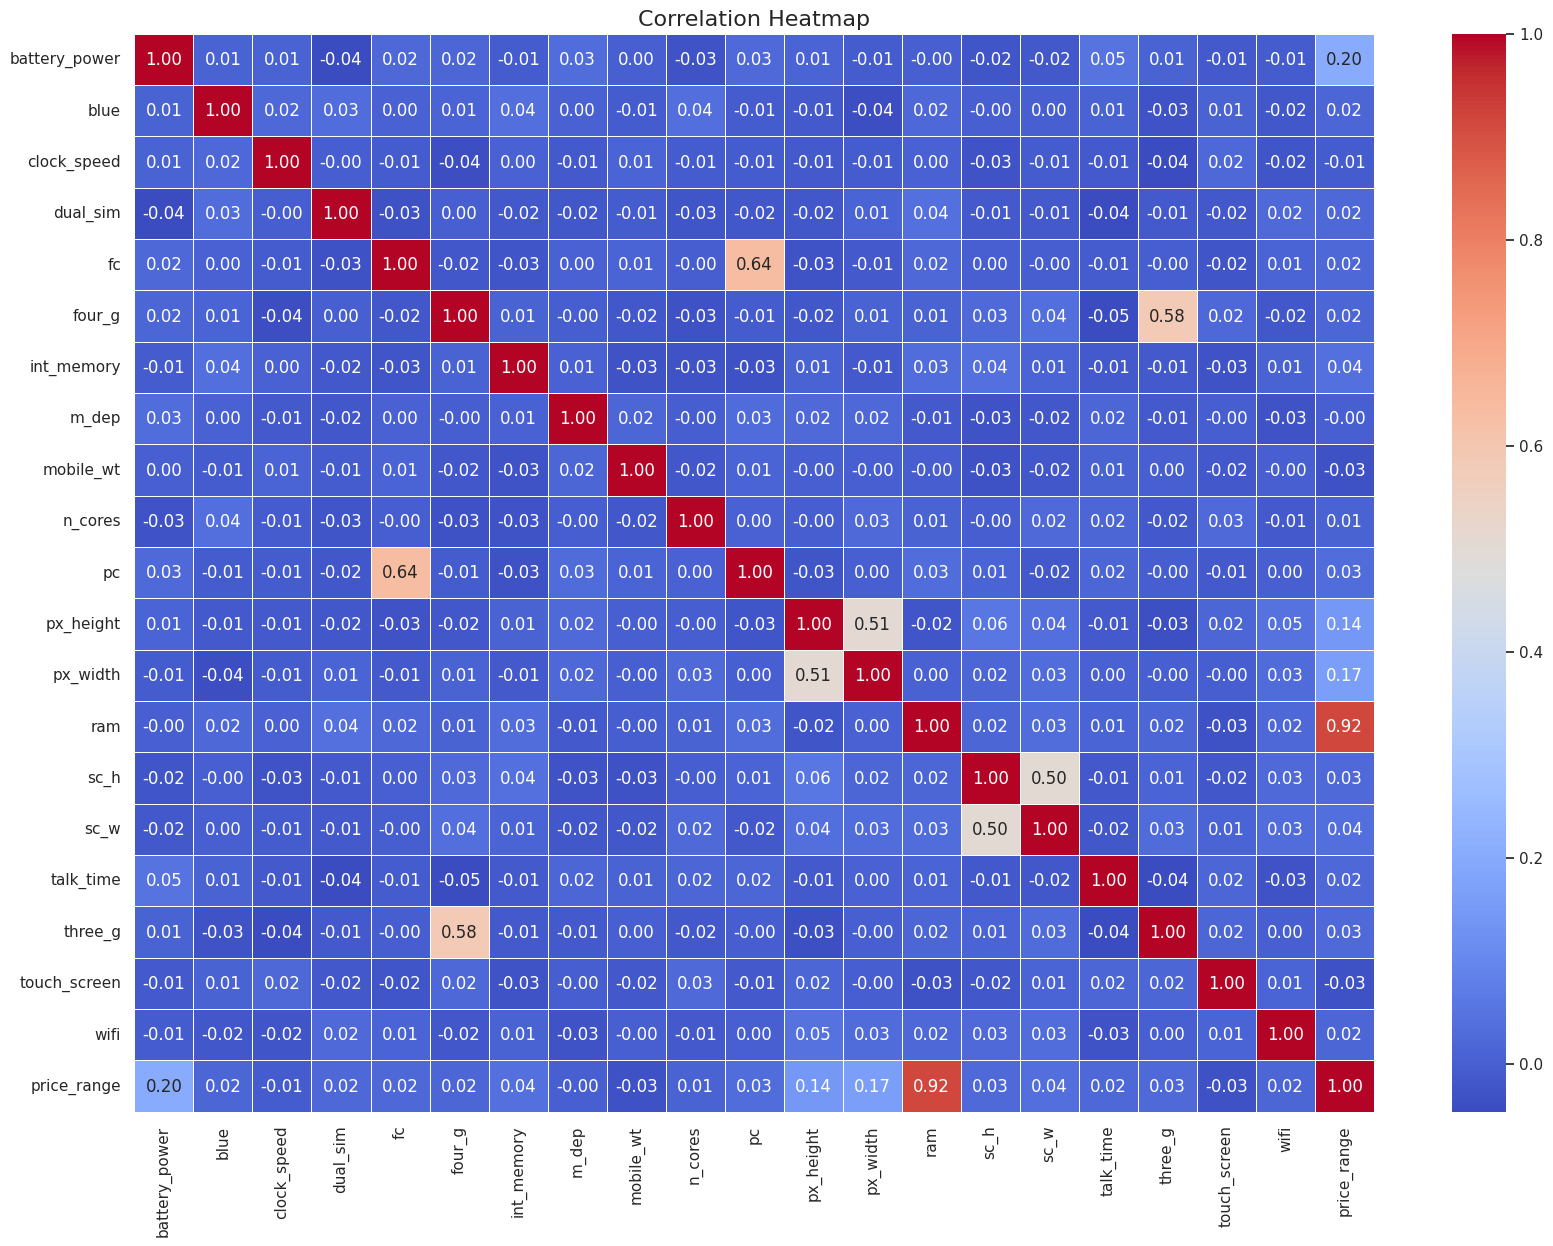

In [17]:
plt.figure(figsize=(20, 14))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Overall no noticable correlations aside from:
pc to fc strong positive
three_g to four_g also strong positive
px_width to pc_height as was expected by scatter plot also positive and noticable
scw and sc_h also follow same correlation as px width and height
also extremely high positive correlations between price_range and ram as we saw in box plot that one grows as grows another, could be argued that higher ram is a causation for a higher price.